For L = 1, probability that the aggregated model is right : 0.7


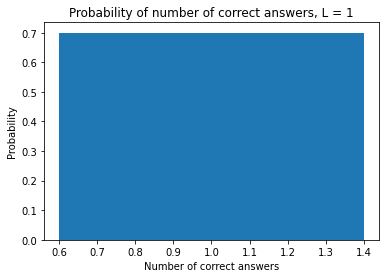

For L = 5, probability that the aggregated model is right : 0.8369199999999999


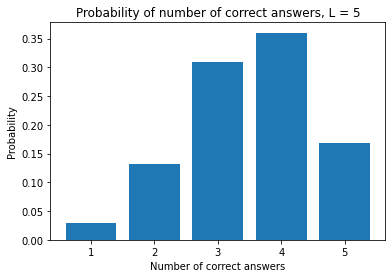

For L = 10, probability that the aggregated model is right : 0.8497316674


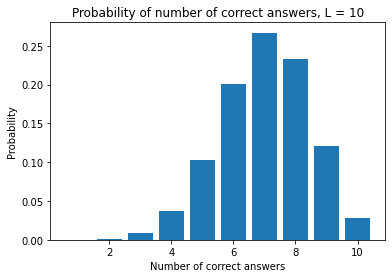

For L = 50, probability that the aggregated model is right : 0.9976304521510178


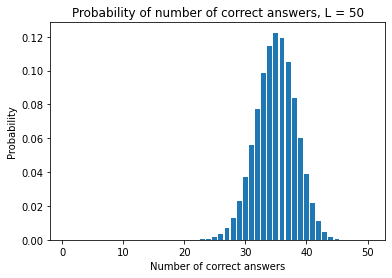

For L = 100, probability that the aggregated model is right : 0.9999779390866729


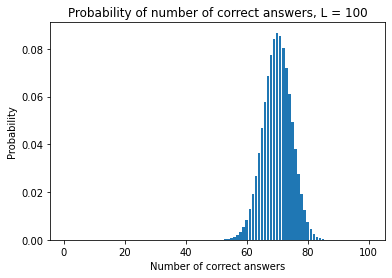

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

p = .7
L_list = [1,5,10,50,100]
L = 10

for L in L_list:
    rv = binom(L, p)
    print(f"For L = {L}, probability that the aggregated model is right : {rv.sf(round(L/2))}")
    x = np.linspace(1,L,L)
    plt.bar(x, rv.pmf(x))
    plt.xlabel("Number of correct answers")
    plt.ylabel("Probability")
    plt.title(f"Probability of number of correct answers, L = {L}")
    plt.show()

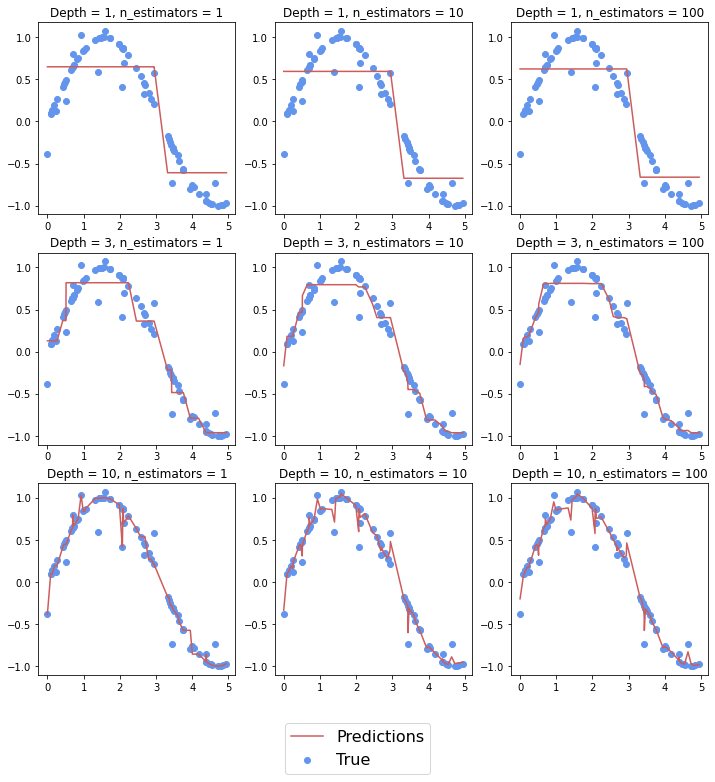

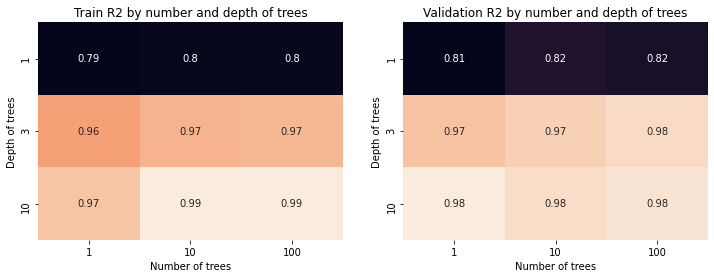

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 *rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 *(0.5 -rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = np.sin(X_test).ravel()

depths = [1,3,10]
estimators = [1,10,100]
scores = np.zeros((len(depths),len(estimators)))
scores_test = np.zeros((len(depths),len(estimators)))

fig = plt.figure(figsize=(12,12))
for i, depth in enumerate(depths): 
    for j, n in enumerate(estimators):
        model = BaggingRegressor(DecisionTreeRegressor(max_depth=depth),n_estimators=n)
        model = model.fit(X, y)
        scores[i,j] = model.score(X, y)
        scores_test[i,j] = model.score(X_test, y_test)
        ax = fig.add_subplot(len(depths), len(estimators), 3*i+j+1)
        ax.scatter(X, y, label="True", color="cornflowerblue")
        ax.plot(X, model.predict(X), label="Predictions", color="indianred")
        plt.title(f"Depth = {depth}, n_estimators = {n}")
fig.legend(*ax.get_legend_handles_labels(), loc="lower center", fontsize=16)
plt.show()
        
fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
sns.heatmap(scores, yticklabels=list(depths), xticklabels=estimators, annot=True, cbar=False)
plt.xlabel("Number of trees")
plt.ylabel("Depth of trees")
plt.title("Train R2 by number and depth of trees")

fig.add_subplot(1,2,2)
sns.heatmap(scores_test, yticklabels=list(depths), xticklabels=estimators, annot=True, cbar=False)
plt.xlabel("Number of trees")
plt.ylabel("Depth of trees")
plt.title("Validation R2 by number and depth of trees")
plt.show()

In [9]:
for noise in range(10,0,-1):
    X = np.sort(5 *rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::noise] += 1 *(0.5 - rng.rand(y[::noise].shape[0]))
    print("Number of noisy points :",y[::noise].shape[0])
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_test = np.sin(X_test).ravel()

    depths = range(1,10)
    estimators = L_list
    scores = np.zeros((len(depths),len(estimators)))
    scores_test = np.zeros((len(depths),len(estimators)))

    """for i, depth in enumerate(depths): 
        for j, n in enumerate(estimators):
            model = BaggingRegressor(DecisionTreeRegressor(max_depth=depth),n_estimators=n,bootstrap=False)
            model = model.fit(X, y)
            scores[i,j] = model.score(X, y)
            scores_test[i,j] = model.score(X_test, y_test)"""
    depth = 10
    n = 50
    model = BaggingRegressor(DecisionTreeRegressor(max_depth=depth),n_estimators=n,bootstrap=True)
    model = model.fit(X, y)
    print(f"Train score : {model.score(X,y)}, Test score : {model.score(X_test,y_test)}")

Number of noisy points : 8
Train score : 0.9959605519569675, Test score : 0.9900908305587796
Number of noisy points : 9
Train score : 0.998572374867424, Test score : 0.9964324652820195
Number of noisy points : 10
Train score : 0.9950949029831371, Test score : 0.9871872311413964
Number of noisy points : 12
Train score : 0.9919728315255059, Test score : 0.9781632732365406
Number of noisy points : 14
Train score : 0.9952215478846557, Test score : 0.9900407731401151
Number of noisy points : 16
Train score : 0.9930078243241615, Test score : 0.9873194296898127
Number of noisy points : 20
Train score : 0.9865893342914998, Test score : 0.977940706529343
Number of noisy points : 27
Train score : 0.9919788346736224, Test score : 0.9838339759666435
Number of noisy points : 40
Train score : 0.9795822237568227, Test score : 0.9440645836002796
Number of noisy points : 80
Train score : 0.965848715715659, Test score : 0.9296514058986832


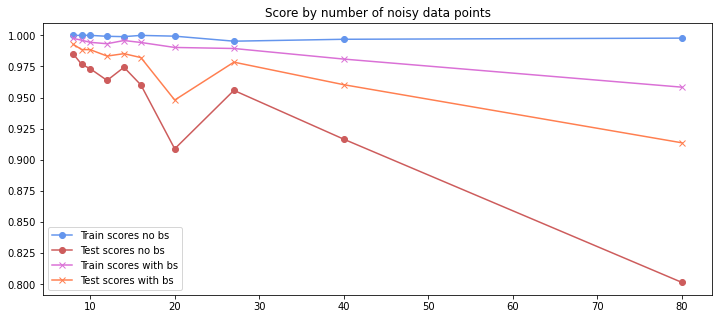

In [50]:
train_scores=list()
test_scores=list()
train_scores_bs=list()
test_scores_bs=list()
n_noise=list()

for noise in range(10,0,-1):
    X = np.sort(5 *rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::noise] += 1 *(0.5 - rng.rand(y[::noise].shape[0]))
    n_noise.append(y[::noise].shape[0])
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_test = np.sin(X_test).ravel()

    depths = range(1,10)
    estimators = L_list
    scores = np.zeros((len(depths),len(estimators)))
    scores_test = np.zeros((len(depths),len(estimators)))

    """for i, depth in enumerate(depths): 
        for j, n in enumerate(estimators):
            model = BaggingRegressor(DecisionTreeRegressor(max_depth=depth),n_estimators=n,bootstrap=False)
            model = model.fit(X, y)
            scores[i,j] = model.score(X, y)
            scores_test[i,j] = model.score(X_test, y_test)"""

    depth = 10
    n = 50
    model = BaggingRegressor(DecisionTreeRegressor(max_depth=depth),n_estimators=n,bootstrap=False)
    model = model.fit(X, y)
    train_scores.append(model.score(X,y))
    test_scores.append(model.score(X_test, y_test))

    depth = 10
    n = 50
    model = BaggingRegressor(DecisionTreeRegressor(max_depth=depth),n_estimators=n,bootstrap=True)
    model = model.fit(X, y)
    train_scores_bs.append(model.score(X,y))
    test_scores_bs.append(model.score(X_test, y_test))
    #print(f"Train score : {model.score(X,y)}, Test score : {model.score(X_test,y_test)}")

plt.figure(figsize=(12,5))
plt.plot(n_noise, train_scores, color="cornflowerblue", marker="o", label="Train scores w/o replacement")
plt.plot(n_noise, test_scores, color="indianred", marker="o", label="Test scores w/o replacement")
plt.plot(n_noise, train_scores_bs, color="orchid", marker="x", label="Train scores w/ bootstrap")
plt.plot(n_noise, test_scores_bs, color="coral", marker="x", label="Test scores w/ bootstrap")
plt.legend()
plt.title("Score by number of noisy data points")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.datasets import *
from sklearn.model_selection import cross_val_score

boston = load_boston()
iris = load_iris()
diabetes = load_diabetes()
digits = load_digits()

datadict = {"iris":iris,"boston":boston,"diabetes":diabetes,"digits":digits}

print("Comparing for classification")
for dataset in ["iris", "digits"]:
    print("Evaluating dataset",dataset)
    dataset = datadict[dataset]
    rf = cross_val_score(RandomForestClassifier(), dataset.data, dataset.target, cv=7)
    svm = cross_val_score(SVC(kernel="linear"), dataset.data, dataset.target, cv=7)
    print(f"RF cross-validated score : {np.mean(rf)} ± {2*np.std(rf)}")
    print(f"SVM cross-validated score : {np.mean(svm)} ± {2*np.std(svm)}")

print("Comparing for regression")
for dataset in ["diabetes", "boston"]:
    print("Evaluating dataset",dataset)
    dataset = datadict[dataset]
    rf = cross_val_score(RandomForestRegressor(), dataset.data, dataset.target, cv=7)
    svm = cross_val_score(SVR(kernel="linear"), dataset.data, dataset.target, cv=7)
    print(f"RF cross-validated score : {np.mean(rf)} ± {2*np.std(rf)}")
    print(f"SVM cross-validated score : {np.mean(svm)} ± {2*np.std(svm)}")

Comparing for classification
Evaluating dataset iris
RF cross-validated score : 0.9465058750773035 ± 0.10630867926821948
SVM cross-validated score : 0.9734075448361164 ± 0.04608853650930542
Evaluating dataset digits
RF cross-validated score : 0.93209986450806 ± 0.05601497027303526
SVM cross-validated score : 0.9499157518065592 ± 0.024101251655497393
Comparing for regression
Evaluating dataset diabetes
RF cross-validated score : 0.4134418589054489 ± 0.1408497754051597
SVM cross-validated score : -0.028076437024497993 ± 0.16502574473802686
Evaluating dataset boston
RF cross-validated score : 0.6538934449222398 ± 0.3468374267670257
SVM cross-validated score : 0.5142916596283018 ± 0.7061180778514444


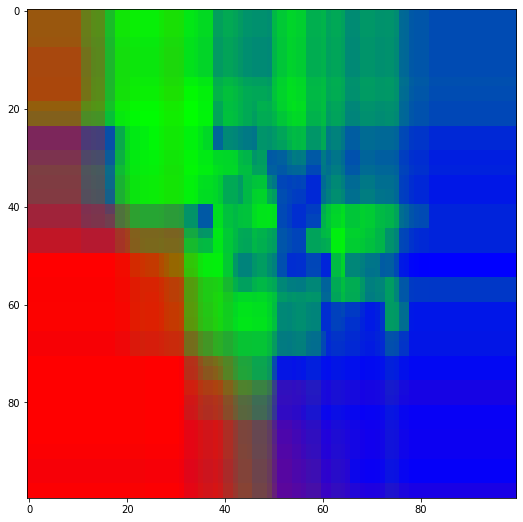

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.50      0.80      0.62        10
           2       0.89      0.50      0.64        16

    accuracy                           0.74        38
   macro avg       0.77      0.77      0.74        38
weighted avg       0.80      0.74      0.73        38



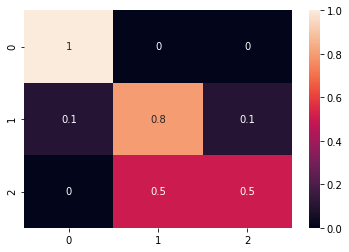

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled) #this is bad
X, X_test, y, y_test = train_test_split(X, y, test_size=.25, random_state=13)

model = RandomForestClassifier().fit(X,y)
planx, plany = np.meshgrid(np.linspace(np.min(X[:,0]), np.max(X[:,0]),100),np.linspace(np.min(X[:,1]), np.max(X[:,1]),100))
preds = model.predict_proba(np.array([planx.ravel(),plany.ravel()]).T)
fig = plt.figure(figsize=(16,9))
plt.imshow(np.array(preds).reshape((list(planx.shape)+[3])))
"""colors = ["red", "green", "blue"]
for tar in range(3):
    plt.scatter(X[y==tar][:,0],X[y==tar][:,1],color=colors[tar])"""
plt.show()

print(classification_report(y_test, model.predict(X_test)))

sns.heatmap(confusion_matrix(y_test, model.predict(X_test), normalize="true"), annot=True)
plt.show()

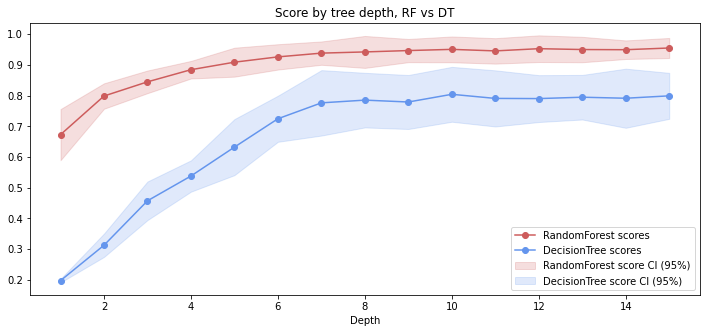

In [32]:
from sklearn.tree import DecisionTreeClassifier

dataset=digits
rf_scores_mean = list()
rf_scores_std = list()
dt_scores_mean = list()
dt_scores_std = list()
for depth in range(1,16):
    rf = cross_val_score(RandomForestClassifier(max_depth=depth), dataset.data, dataset.target, cv=6)
    dt = cross_val_score(DecisionTreeClassifier(max_depth=depth), dataset.data, dataset.target, cv=6)
    rf_scores_mean.append(np.mean(rf))
    rf_scores_std.append(2*np.std(rf))
    dt_scores_mean.append(np.mean(dt))
    dt_scores_std.append(2*np.std(dt))
    #print(f"RF cross-validated score : {np.mean(rf)} ± {2*np.std(rf)}")
    #print(f"DecisionTree cross-validated score : {np.mean(dt)} ± {2*np.std(dt)}")

rf_scores_mean = np.array(rf_scores_mean)
rf_scores_std = np.array(rf_scores_std)
dt_scores_mean = np.array(dt_scores_mean)
dt_scores_std = np.array(dt_scores_std)

plt.figure(figsize=(12,5))
plt.plot(range(1,16), rf_scores_mean, color="indianred", marker="o", label="RandomForest scores")
plt.plot(range(1,16), dt_scores_mean, color="cornflowerblue", marker="o", label="DecisionTree scores")
plt.fill_between(range(1,16), rf_scores_mean-rf_scores_std, rf_scores_mean+rf_scores_std, \
                 color="indianred", alpha=.2, label="RandomForest score CI (95%)")
plt.fill_between(range(1,16), dt_scores_mean-dt_scores_std, dt_scores_mean+dt_scores_std, \
                 color="cornflowerblue", alpha=.2, label="DecisionTree score CI (95%)")
plt.xlabel("Depth")
plt.legend()
plt.title("Score by tree depth, RF vs DT")
plt.show()

CV score for depth 1 : 0.2615310293571163 ± 0.050679365566838316


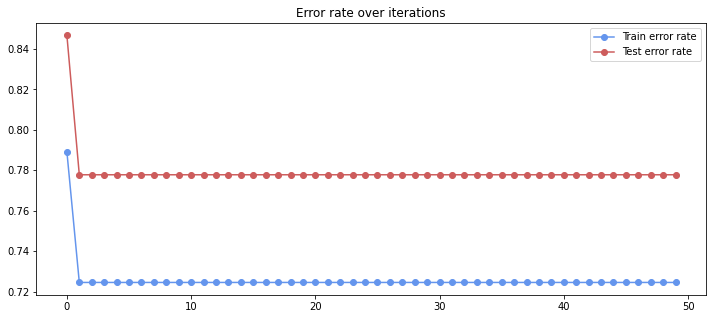

CV score for depth 2 : 0.6444481605351171 ± 0.20690921124191064


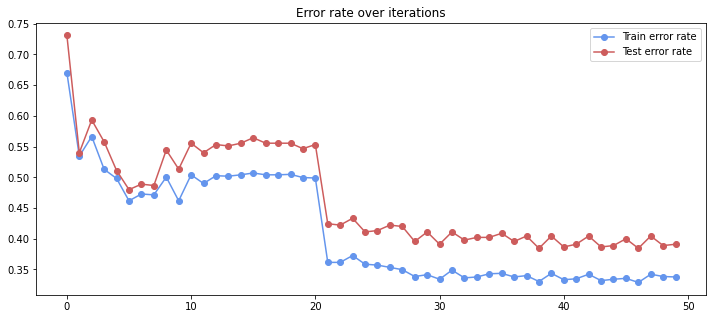

CV score for depth 10 : 0.9532552954292086 ± 0.03494129539283943


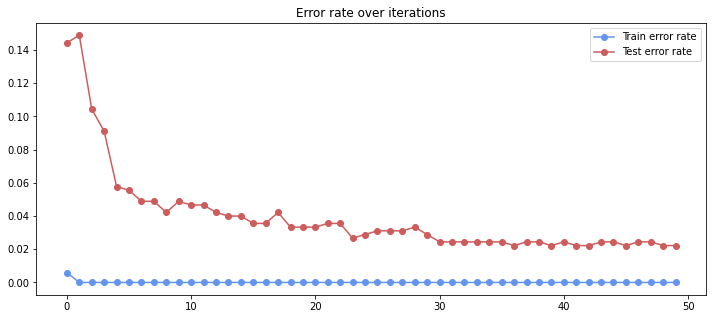

In [36]:
from sklearn.ensemble import AdaBoostClassifier

depths = [1,2,10]

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.25, random_state=13)

for depth in depths:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth)), digits.data, digits.target, cv=6)
    print(f"CV score for depth {depth} : {np.mean(scores)} ± {2*np.std(scores)}")

    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth)).fit(X_train, y_train)
    train_scores = 1-np.array(list(model.staged_score(X_train, y_train)))
    test_scores = 1-np.array(list(model.staged_score(X_test, y_test)))

    plt.figure(figsize=(12,5))
    plt.plot(range(len(train_scores)), train_scores, c="cornflowerblue", label="Train error rate", marker="o")
    plt.plot(range(len(test_scores)), test_scores, c="indianred", label="Test error rate", marker="o")
    plt.legend()
    plt.title("Error rate over iterations")
    plt.show()